In [1]:
# https://medium.com/swlh/resnet-with-tensorflow-transfer-learning-13ff0773cf0c

In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import datasets, layers, models, losses, Model

In [3]:
(x_train,y_train),(x_test,y_test) = datasets.mnist.load_data()
x_train = tf.pad(x_train, [[0, 0], [2,2], [2,2]])/255
x_test = tf.pad(x_test, [[0, 0], [2,2], [2,2]])/255
x_train = tf.expand_dims(x_train, axis=3, name=None)
x_test = tf.expand_dims(x_test, axis=3, name=None)
x_train = tf.repeat(x_train, 3, axis=3)
x_test = tf.repeat(x_test, 3, axis=3)
x_val = x_train[-2000:,:,:,:]
y_val = y_train[-2000:]
x_train = x_train[:-2000,:,:,:]
y_train = y_train[:-2000]

In [4]:
base_model = tf.keras.applications.ResNet152(weights = 'imagenet', include_top = False, input_shape = (32,32,3))
for layer in base_model.layers:
  layer.trainable = False

234698864/234698864 [==============================] - 27s 0us/step


In [5]:
x = layers.Flatten()(base_model.output)
x = layers.Dense(1000, activation='relu')(x)
predictions = layers.Dense(10, activation = 'softmax')(x)

In [6]:
head_model = Model(inputs = base_model.input, outputs = predictions)
head_model.compile(optimizer='adam', loss=losses.sparse_categorical_crossentropy, metrics=['accuracy'])

In [7]:
history = head_model.fit(x_train, y_train, batch_size=64, epochs=40, validation_data=(x_val, y_val))

Epoch 1/40
907/907 [==============================] - 357s 384ms/step - loss: 0.8974 - accuracy: 0.7048 - val_loss: 0.5084 - val_accuracy: 0.8620
Epoch 2/40
907/907 [==============================] - 345s 381ms/step - loss: 0.5855 - accuracy: 0.8080 - val_loss: 0.4417 - val_accuracy: 0.8590
Epoch 3/40
907/907 [==============================] - 414s 456ms/step - loss: 0.5092 - accuracy: 0.8332 - val_loss: 0.3416 - val_accuracy: 0.9095
Epoch 4/40
907/907 [==============================] - 396s 437ms/step - loss: 0.4563 - accuracy: 0.8497 - val_loss: 0.3513 - val_accuracy: 0.9025
Epoch 5/40
907/907 [==============================] - 384s 423ms/step - loss: 0.4212 - accuracy: 0.8615 - val_loss: 0.2986 - val_accuracy: 0.9075
Epoch 6/40
907/907 [==============================] - 391s 431ms/step - loss: 0.3917 - accuracy: 0.8708 - val_loss: 0.2695 - val_accuracy: 0.9255
Epoch 7/40
907/907 [==============================] - 344s 379ms/step - loss: 0.3714 - accuracy: 0.8781 - val_loss: 0.2553 -

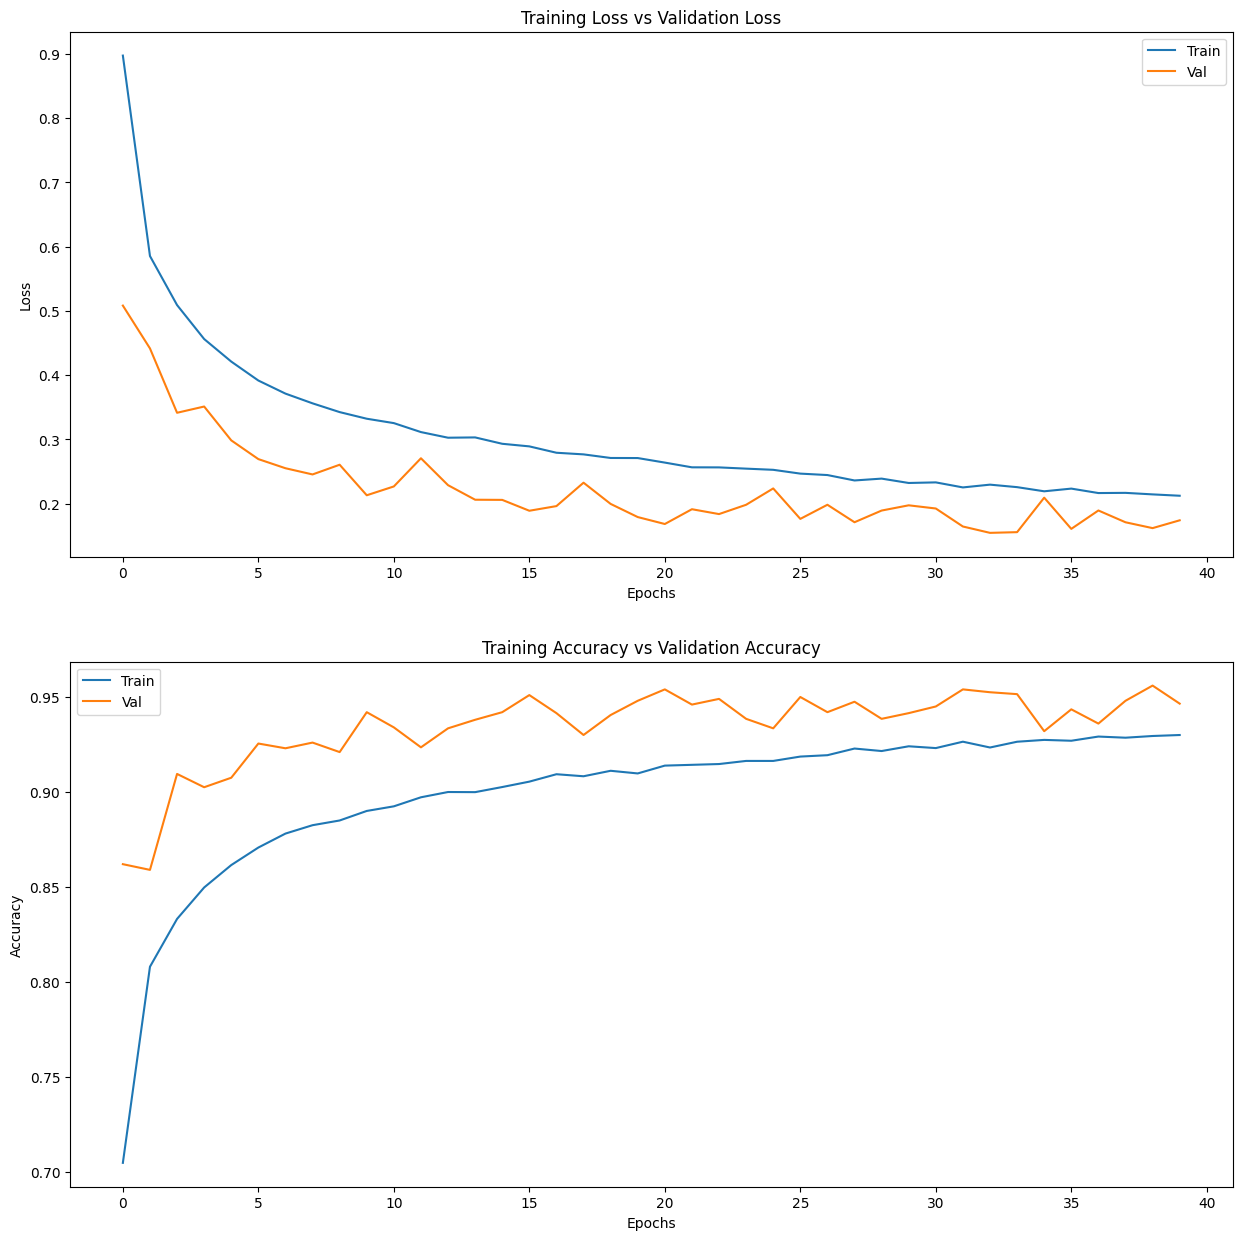

In [8]:
fig, axs = plt.subplots(2, 1, figsize=(15,15))
axs[0].plot(history.history['loss'])
axs[0].plot(history.history['val_loss'])
axs[0].title.set_text('Training Loss vs Validation Loss')
axs[0].set_xlabel('Epochs')
axs[0].set_ylabel('Loss')
axs[0].legend(['Train','Val'])
axs[1].plot(history.history['accuracy'])
axs[1].plot(history.history['val_accuracy'])
axs[1].title.set_text('Training Accuracy vs Validation Accuracy')
axs[1].set_xlabel('Epochs')
axs[1].set_ylabel('Accuracy')
axs[1].legend(['Train', 'Val'])

In [9]:
head_model.evaluate(x_test, y_test)

313/313 [==============================] - 70s 224ms/step - loss: 0.2247 - accuracy: 0.9291


[0.22474819421768188, 0.929099977016449]